### Target Customer Compass: Segmentation for Retail Businesses

I have designed a customer segmentation model to enhance retail marketing strategies by categorizing customers based on purchasing behavior, demographics, and preferences. I also leveraged advanced data analytics and clustering techniques to identify distinct customer groups, providing actionable insights for tailored marketing campaigns, improved customer engagement, and optimized product offerings. The model helps retailers better understand their customer base and make data-driven decisions to boost sales and customer satisfaction.

In [72]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
# Step 1: Load the Dataset
# Load the CSV file that was uploaded

data = pd.read_csv('Retail_Transactions_Dataset.csv')
data

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1000999995,2023-03-27 06:12:10,Lisa Gonzalez,"['Pickles', 'Carrots', 'Peanut Butter', 'Spong...",1,22.07,Debit Card,Los Angeles,Supermarket,False,Middle-Aged,Winter,NaN
999996,1000999996,2022-05-19 05:13:58,Emily Graham,['Cereal'],8,80.25,Cash,Houston,Warehouse Club,True,Senior Citizen,Spring,Discount on Selected Items
999997,1000999997,2021-09-03 13:59:39,Cynthia Anderson,['Trash Bags'],3,60.74,Credit Card,Los Angeles,Convenience Store,False,Homemaker,Winter,NaN
999998,1000999998,2023-10-17 05:50:40,Michael Rodriguez,"['Diapers', 'Coffee', 'Coffee', 'Mop']",3,23.48,Debit Card,San Francisco,Supermarket,True,Retiree,Winter,BOGO (Buy One Get One)


In [118]:
# Convert the 'Date' column from string to datetime format
data['Date'] = pd.to_datetime(data['Date'])
data['Date']

# Extract new features from 'date_time'
data['hour'] = data['Date'].dt.hour
data['day_of_week'] = data['Date'].dt.dayofweek
data['month'] = data['Date'].dt.month

# Display the first few rows with the new features
print(data['Date'].head())

0   2022-01-21 06:27:29
1   2023-03-01 13:01:21
2   2024-03-21 15:37:04
3   2020-10-31 09:59:47
4   2020-12-10 00:59:59
Name: Date, dtype: datetime64[ns]


In [120]:
# One-hot encode categorical variables: Payment_Method, City, Store_Type, Customer_Category, Season, Promotion
# 'get_dummies()' creates dummy variables for categorical columns, making them numeric for the model
categorical_cols = ['Payment_Method', 'City', 'Store_Type', 'Customer_Category', 'Season', 'Promotion']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
data_encoded

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Discount_Applied,hour,day_of_week,month,...,Customer_Category_Professional,Customer_Category_Retiree,Customer_Category_Senior Citizen,Customer_Category_Student,Customer_Category_Teenager,Customer_Category_Young Adult,Season_Spring,Season_Summer,Season_Winter,Promotion_Discount on Selected Items
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,True,6,4,1,...,False,False,False,False,False,False,False,False,True,False
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,True,13,2,3,...,True,False,False,False,False,False,False,False,False,False
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,True,15,3,3,...,True,False,False,False,False,False,False,False,True,False
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,True,9,5,10,...,False,False,False,False,False,False,True,False,False,False
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,False,0,3,12,...,False,False,False,False,False,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1000999995,2023-03-27 06:12:10,Lisa Gonzalez,"['Pickles', 'Carrots', 'Peanut Butter', 'Spong...",1,22.07,False,6,0,3,...,False,False,False,False,False,False,False,False,True,False
999996,1000999996,2022-05-19 05:13:58,Emily Graham,['Cereal'],8,80.25,True,5,3,5,...,False,False,True,False,False,False,True,False,False,True
999997,1000999997,2021-09-03 13:59:39,Cynthia Anderson,['Trash Bags'],3,60.74,False,13,4,9,...,False,False,False,False,False,False,False,False,True,False
999998,1000999998,2023-10-17 05:50:40,Michael Rodriguez,"['Diapers', 'Coffee', 'Coffee', 'Mop']",3,23.48,True,5,1,10,...,False,True,False,False,False,False,False,False,True,False


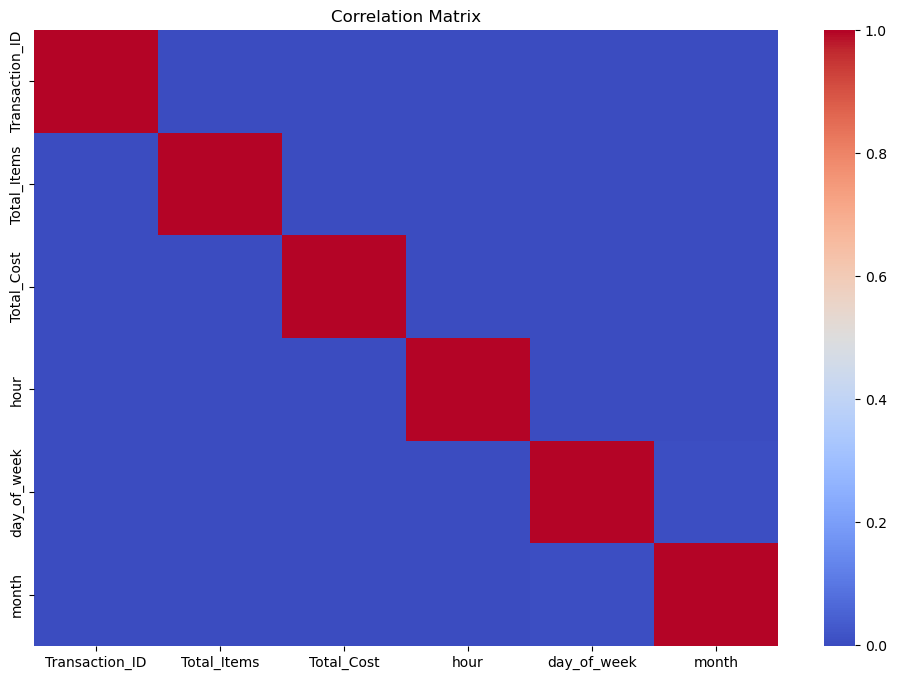

In [122]:
# Drop non-numeric columns before computing the correlation matrix
numeric_columns = data_encoded.select_dtypes(include=[np.number]) # this command uses the numeric columns only.

# Visualize the correlation matrix using only the numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



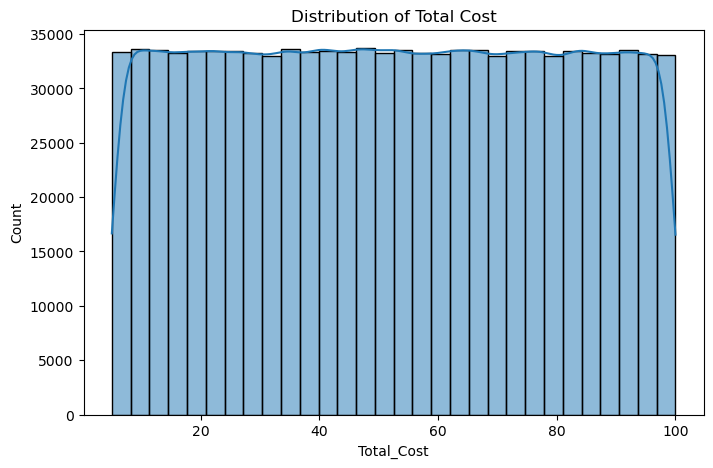

In [124]:
# Visualizing the distribution of 'Total_Cost' using a histogram
plt.figure(figsize=(8, 5))
sns.histplot(data['Total_Cost'], bins=30, kde=True)
plt.title('Distribution of Total Cost')
plt.show()

In [126]:
# Step 4: Feature Scaling
# Standardizing the features to have a mean of 0 and a variance of 1 for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_encoded.drop(columns=['Transaction_ID', 'Date', 'Customer_Name', 'Product']))
scaled_features

array([[-0.86916533,  0.70010566,  0.99979202, ..., -0.57676676,
         1.73314616, -0.70716512],
       [-1.21739685, -0.96747435,  0.99979202, ..., -0.57676676,
        -0.57698538, -0.70716512],
       [ 0.17552923, -0.39994274,  0.99979202, ..., -0.57676676,
         1.73314616, -0.70716512],
       ...,
       [-0.86916533,  0.30217701, -1.00020802, ..., -0.57676676,
         1.73314616, -0.70716512],
       [-0.86916533, -1.05683504,  0.99979202, ..., -0.57676676,
         1.73314616, -0.70716512],
       [ 0.87199227, -0.30401677, -1.00020802, ..., -0.57676676,
        -0.57698538,  1.4140969 ]])

In [128]:
# Step 5: Clustering using KMeans
# Using the Elbow Method to determine the optimal number of clusters
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

In [130]:
# Step 6: Applying KMeans Clustering
# Based on the Elbow Method, we will choose the optimal number of clusters (let's assume 4 clusters)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data_encoded['Cluster'] = kmeans.fit_predict(scaled_features)
data_encoded

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Discount_Applied,hour,day_of_week,month,...,Customer_Category_Retiree,Customer_Category_Senior Citizen,Customer_Category_Student,Customer_Category_Teenager,Customer_Category_Young Adult,Season_Spring,Season_Summer,Season_Winter,Promotion_Discount on Selected Items,Cluster
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,True,6,4,1,...,False,False,False,False,False,False,False,True,False,1
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,True,13,2,3,...,False,False,False,False,False,False,False,False,False,2
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,True,15,3,3,...,False,False,False,False,False,False,False,True,False,1
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,True,9,5,10,...,False,False,False,False,False,True,False,False,False,1
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,False,0,3,12,...,False,False,False,False,True,False,False,True,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1000999995,2023-03-27 06:12:10,Lisa Gonzalez,"['Pickles', 'Carrots', 'Peanut Butter', 'Spong...",1,22.07,False,6,0,3,...,False,False,False,False,False,False,False,True,False,1
999996,1000999996,2022-05-19 05:13:58,Emily Graham,['Cereal'],8,80.25,True,5,3,5,...,False,True,False,False,False,True,False,False,True,2
999997,1000999997,2021-09-03 13:59:39,Cynthia Anderson,['Trash Bags'],3,60.74,False,13,4,9,...,False,False,False,False,False,False,False,True,False,1
999998,1000999998,2023-10-17 05:50:40,Michael Rodriguez,"['Diapers', 'Coffee', 'Coffee', 'Mop']",3,23.48,True,5,1,10,...,True,False,False,False,False,False,False,True,False,0


In [142]:
# Step 7: Analyzing the Clusters
# Let's take a look at the average values of each feature in each cluster
cluster_analysis = data_encoded['Cluster'].mean()

cluster_analysis

1.461638

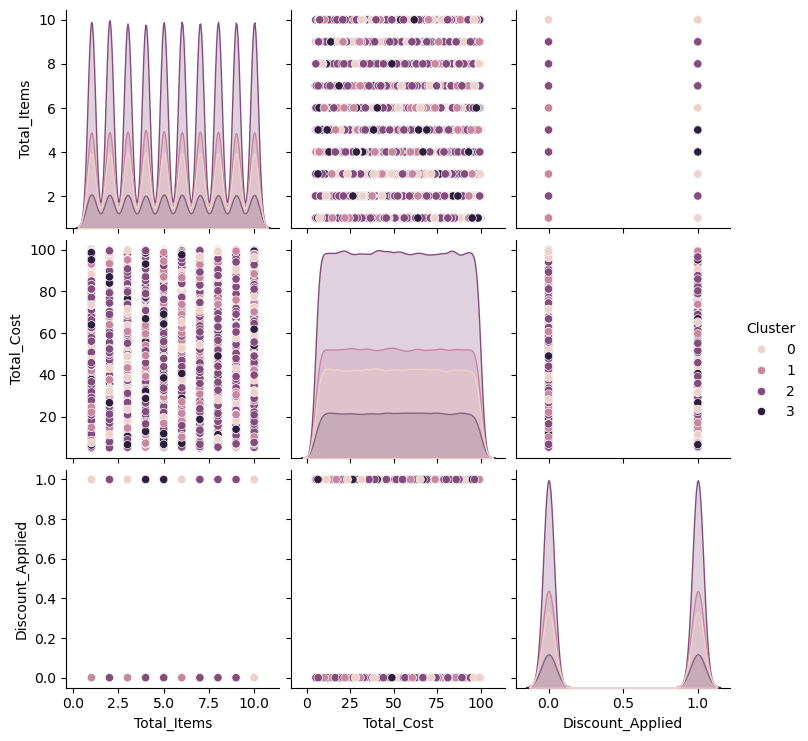

In [144]:
# Step 8: Visualizing the Cluster Distributions
# Visualizing clusters using a pairplot (for visualizing clusters on certain features)
sns.pairplot(data_encoded, hue='Cluster', vars=['Total_Items', 'Total_Cost', 'Discount_Applied'])
plt.show()


### Key Insights
In this project, I developed a customer segmentation model for a retail business using KMeans clustering to categorize customers based on their purchasing behavior, demographics, and preferences. The process involved several key steps: feature extraction, encoding categorical variables, feature scaling, and applying the KMeans algorithm to group customers into distinct clusters.
### Key Insights:

### Feature Extraction and Correlation Analysis:
        By creating new features from the 'Date' column (such as hour, day of the week, and month), I enriched the dataset with temporal insights.
        The correlation matrix highlighted relationships between features, which helped in understanding which variables might influence customer behavior the most.

### Distribution of Total Cost:
        The histogram of 'Total_Cost' provided a visual understanding of how total expenditure was distributed across customers. This likely helped to identify spending patterns that differentiate various customer segments.

### Optimal Number of Clusters (Elbow Method):
        Using the elbow method, the optimal number of clusters was determined to be 4. This suggests that customers naturally fall into four distinct segments based on the available data.

### KMeans Clustering:
        After applying KMeans with 4 clusters, each customer was assigned to one of these groups. The clusters represent different customer segments based on their shopping behaviors and other features.

### Cluster Analysis:
        By analyzing the average values of features within each cluster, we gained valuable insights into the characteristics of each customer segment. For instance, some clusters may represent high spenders, while others reflect more budget-conscious shoppers. This breakdown can be used to tailor marketing strategies more effectively for each group.

### Cluster Visualization:
        The pairplot provided a visual overview of how customers are distributed across the clusters, allowing us to identify how features like Total_Items, Total_Cost, and Discount_Applied differ between the clusters. This helps in visually differentiating distinct customer types.

### Conclusion:

The customer segmentation model successfully grouped customers into meaningful clusters based on their transaction data. By leveraging this segmentation, the retail business can now design targeted marketing campaigns and promotions tailored to the specific needs and behaviors of each customer group. Additionally, the segmentation will enable better decision-making in terms of product offerings, pricing strategies, and customer engagement, ultimately driving improved sales and customer satisfaction.

The model is robust and flexible, allowing for continuous updates as more data becomes available, and it can be refined further by incorporating additional customer attributes.